In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

On importe les données

In [2]:
data_olist_final = pd.read_csv('df2.csv')

In [3]:
data_olist_final

,customer_state,payment_type,product_category_name_english,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,price
0,SP,credit_card,Home,129.90,3.0,3,8.0,141.90,5.0,12.00,60.0,236.0,1.0,129.90
1,SP,credit_card,Health_Beauty,18.90,0.0,3,1.0,27.19,4.0,8.29,56.0,635.0,1.0,18.90
2,SC,credit_card,Office_Supplies,69.00,1.0,0,8.0,86.22,3.0,17.22,49.0,177.0,3.0,69.00
3,PA,credit_card,Technology,25.99,1.0,0,4.0,43.62,4.0,17.63,43.0,1741.0,5.0,25.99
4,SP,credit_card,Technology,180.00,4.0,3,6.0,196.89,5.0,16.89,58.0,794.0,3.0,180.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93391,PE,credit_card,Health_Beauty,1570.00,31.0,0,10.0,4134.84,5.0,248.71,54.0,478.5,1.0,785.00
93392,BA,credit_card,Baby,64.89,1.0,3,1.0,84.58,4.0,19.69,37.0,506.0,2.0,64.89
93393,MT,credit_card,Automotive,89.90,2.0,0,1.0,112.46,5.0,22.56,57.0,716.0,5.0,89.90
93394,ES,credit_card,Fashion_Accessories,115.00,2.0,3,5.0,133.69,5.0,18.69,35.0,591.0,3.0,115.00


On crée un sample pour tester

In [4]:
df = data_olist_final.sample(frac=0.3, random_state=48)


In [5]:
df =df.drop(columns=["product_name_lenght"])

In [6]:
# from sklearn import preprocessing
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd
# import numpy as np

# # Séparer les variables numériques et catégoriques
# numeric_cols = df.select_dtypes(include=[np.number]).columns
# categorical_cols = df.select_dtypes(include=[object]).columns

# # Encoder les variables catégoriques avec OneHotEncoder
# onehot_encoder = OneHotEncoder(sparse=False)
# onehot_encoded = onehot_encoder.fit_transform(df[categorical_cols])
# onehot_encoded_columns = [f'{col}_{value}' for col, categories in zip(categorical_cols, onehot_encoder.categories_) for value in categories]
# onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoded_columns, index=df.index)

# # Normaliser les variables numériques
# df[numeric_cols] = preprocessing.StandardScaler().fit_transform(df[numeric_cols])

# # Combiner les variables numériques et catégoriques encodées en une seule dataframe
# df_encoded = pd.concat([df[numeric_cols], onehot_encoded_df], axis=1)


In [7]:
# from sklearn.decomposition import PCA
# X = df_encoded_test
# n_dims = X.shape[1]
# model = PCA(n_components=n_dims)
# model.fit(X)

# variances = model.explained_variance_ratio_

# meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)

# import matplotlib.pyplot as plt
# plt.bar(range(n_dims), np.cumsum(variances))
# plt.hlines(0.90, 0, meilleur_dims, colors='r')
# plt.vlines(meilleur_dims, 0, 0.90, colors='r')

In [8]:
df

,customer_state,payment_type,product_category_name_english,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price
78319,SP,credit_card,Books,35.90,1.0,3,1.0,52.01,5.0,16.110000,623.000000,5.0,35.900000
35213,SC,credit_card,Fashion_Accessories,134.90,3.0,3,2.0,153.09,4.0,18.190000,345.000000,4.0,134.900000
59459,SP,credit_card,Toys_Games,369.00,7.0,3,7.0,390.77,5.0,21.770000,1944.000000,1.0,369.000000
64535,SP,credit_card,Home,99.00,2.0,3,7.0,114.00,5.0,15.000000,188.000000,1.0,99.000000
59983,SP,credit_card,Sports_Leisure,30.90,1.0,3,3.0,38.29,4.0,7.390000,722.000000,2.0,30.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34330,SC,boleto,Home,23.90,0.0,0,1.0,39.00,5.0,15.100000,561.000000,2.0,23.900000
48335,SP,credit_card,Agro_Industry_Commerce,138.00,3.0,3,1.0,151.87,4.0,13.870000,1561.000000,2.0,138.000000
75209,PA,credit_card,Fashion_Accessories,99.90,2.0,0,4.0,129.00,5.0,29.100000,404.000000,4.0,99.900000
2065,GO,boleto,Sports_Leisure,99.00,2.0,3,1.0,114.44,1.0,15.440000,1301.000000,1.0,99.000000


In [9]:
categorical_cols = df.select_dtypes(include=[object]).columns
categorical_col_indices = [df.columns.get_loc(col) for col in categorical_cols]

In [10]:
# # Exécution de l'algorithme k-prototypes pour différents nombres de clusters
# SSE = []
# for cluster in range(1, 10):
#     kproto = KPrototypes(n_clusters=cluster, init='Cao',max_iter=10, n_init=5,n_jobs=-2, verbose=False)
#     clusters = kproto.fit_predict(df, categorical=categorical_col_indices)
#     SSE.append(kproto.cost_)
    
# # Tracé de la somme des distances intra-cluster pour différents nombres de clusters
# plt.plot(range(1, 10), SSE, marker='o')
# plt.xlabel('Nombre de clusters')
# plt.ylabel('SSE')
# plt.show()

In [11]:
# from kneed import KneeLocator
# kneedle = KneeLocator(range(1, 10), SSE, curve='convex', direction='decreasing')
# k_optimal = kneedle.elbow

# # Tracé de la somme des distances intra-cluster pour différents nombres de clusters
# plt.plot(range(1, 10), SSE, marker='o')
# plt.xlabel('Nombre de clusters')
# plt.ylabel('SSE')
# plt.title('Méthode du coude pour trouver le nombre optimal de clusters')
# plt.vlines(k_optimal, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
# plt.show()

est ce que 4 cluster c'est assez ? Vérifios avec un silhouette score .

In [13]:

# Appliquer l'algorithme k-prototypes
kproto = KPrototypes(n_clusters=5, init='Cao',max_iter=10, n_init=5,n_jobs=-2, verbose=False)
clusters = kproto.fit_predict(df, categorical=categorical_col_indices)


df_copy =df.copy()
# Ajouter une colonne de clusters au dataframe
df_copy['cluster'] = clusters



In [14]:
df_copy

,customer_state,payment_type,product_category_name_english,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price,cluster
78319,SP,credit_card,Books,35.90,1.0,3,1.0,52.01,5.0,16.110000,623.000000,5.0,35.900000,3
35213,SC,credit_card,Fashion_Accessories,134.90,3.0,3,2.0,153.09,4.0,18.190000,345.000000,4.0,134.900000,3
59459,SP,credit_card,Toys_Games,369.00,7.0,3,7.0,390.77,5.0,21.770000,1944.000000,1.0,369.000000,4
64535,SP,credit_card,Home,99.00,2.0,3,7.0,114.00,5.0,15.000000,188.000000,1.0,99.000000,3
59983,SP,credit_card,Sports_Leisure,30.90,1.0,3,3.0,38.29,4.0,7.390000,722.000000,2.0,30.900000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34330,SC,boleto,Home,23.90,0.0,0,1.0,39.00,5.0,15.100000,561.000000,2.0,23.900000,3
48335,SP,credit_card,Agro_Industry_Commerce,138.00,3.0,3,1.0,151.87,4.0,13.870000,1561.000000,2.0,138.000000,2
75209,PA,credit_card,Fashion_Accessories,99.90,2.0,0,4.0,129.00,5.0,29.100000,404.000000,4.0,99.900000,3
2065,GO,boleto,Sports_Leisure,99.00,2.0,3,1.0,114.44,1.0,15.440000,1301.000000,1.0,99.000000,2


In [15]:
mode_col = ['customer_state','payment_type','product_category_name_english']
mean_col = ['payment_installments', 'payment_value','review_score','freight_value','product_description_lenght','product_photos_qty','price']
last_col = ['prix_total','montant','frequence']

dict_agg = {}

for col in mode_col:
    dict_agg[f'{col}'] = pd.Series.mode

for col in last_col:
    dict_agg[f'{col}'] = 'last'

for col in mean_col:
    dict_agg[f'{col}'] = 'mean'

df_grouped = df_copy.groupby(df_copy['cluster']).agg(dict_agg)


In [16]:
df_grouped

,customer_state,payment_type,product_category_name_english,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price
cluster,,,,,,,,,,,,,
0,SP,credit_card,Home,1957.72,39.0,3,5.866586,2376.514496,3.736287,49.007927,1053.819932,2.249287,951.699434
1,SP,credit_card,Technology,2919.40,58.0,3,5.800000,19380.811000,2.300000,30.883583,1150.800000,2.033333,584.090833
2,SP,credit_card,Home,99.00,2.0,3,2.888591,188.530450,4.122051,20.903707,1100.523222,2.483189,128.196077
3,SP,credit_card,Home,99.90,2.0,0,2.810124,154.730084,4.113083,18.713738,416.674090,2.095296,96.407891
4,SP,credit_card,Health_Beauty,59.99,1.0,3,3.162664,248.437874,4.168497,23.642307,2537.013746,2.577375,188.958025


In [32]:
df_grouped.to_csv('df_cluster.csv', index=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28019 entries, 78319 to 70330
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_state                 28019 non-null  object 
 1   payment_type                   28019 non-null  object 
 2   product_category_name_english  28019 non-null  object 
 3   prix_total                     28019 non-null  float64
 4   montant                        28019 non-null  float64
 5   frequence                      28019 non-null  int64  
 6   payment_installments           28019 non-null  float64
 7   payment_value                  28019 non-null  float64
 8   review_score                   28019 non-null  float64
 9   freight_value                  28019 non-null  float64
 10  product_description_lenght     28019 non-null  float64
 11  product_photos_qty             28019 non-null  float64
 12  price                          28019 non-n

In [18]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np



# Séparer les variables numériques et catégoriques
numeric_cols = df_copy.select_dtypes(include=[np.number]).columns
categorical_cols = df_copy.select_dtypes(include=[object]).columns

# Appliquer une transformation logarithmique sur les variables numériques
df_copy[numeric_cols] = np.log(df_copy[numeric_cols] + 1)

# Encoder les variables catégoriques avec OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df_copy[categorical_cols])
onehot_encoded_columns = [f'{col}_{value}' for col, categories in zip(categorical_cols, onehot_encoder.categories_) for value in categories]
onehot_encoded_df_copy = pd.DataFrame(onehot_encoded, columns=onehot_encoded_columns, index=df_copy.index)

# Normaliser les variables numériques
df_copy[numeric_cols] = preprocessing.StandardScaler().fit_transform(df_copy[numeric_cols])

# Combiner les variables numériques et catégoriques encodées en une seule dataframe
df_copy_encoded = pd.concat([df_copy[numeric_cols], onehot_encoded_df_copy], axis=1)

/home/yanis/miniconda3/envs/segmentation_client/lib/python3.9/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
df_copy_encoded

,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price,...,product_category_name_english_Health_Beauty,product_category_name_english_Home,product_category_name_english_Market_place,product_category_name_english_Office_Supplies,product_category_name_english_Party_Supplies,product_category_name_english_Pet_Supplies,product_category_name_english_Signaling_Security,product_category_name_english_Sports_Leisure,product_category_name_english_Technology,product_category_name_english_Toys_Games
78319,-0.969860,-0.635814,0.651279,-0.859753,-0.931871,0.604067,-0.142833,0.050710,1.639852,-0.861200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35213,0.417038,0.414666,0.651279,-0.147157,0.237957,0.076069,0.085380,-0.712552,1.224683,0.578879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59459,1.482533,1.465145,0.651279,1.576630,1.260968,0.604067,0.425642,1.522155,-0.861822,1.685230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64535,0.090715,-0.021323,0.651279,1.576630,-0.082829,0.604067,-0.276258,-1.495204,-0.861822,0.240043,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59983,-1.124756,-0.635814,0.651279,0.358438,-1.260228,0.076069,-1.560382,0.241307,0.061471,-1.022036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34330,-1.388303,-1.686293,-1.535441,-0.859753,-1.240593,0.604067,-0.263864,-0.084736,0.061471,-1.295688,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48335,0.441032,0.414666,0.651279,-0.859753,0.229242,0.076069,-0.421953,1.238322,0.061471,0.603793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75209,0.100247,-0.021323,-1.535441,0.750608,0.051581,0.604067,0.980790,-0.508767,1.224683,0.249940,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,0.090715,-0.021323,0.651279,-0.859753,-0.078643,-2.577483,-0.222293,1.002675,-0.861822,0.240043,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
grouped_df = df_copy_encoded.groupby('cluster')


In [21]:
grouped_df.head()

,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price,...,product_category_name_english_Health_Beauty,product_category_name_english_Home,product_category_name_english_Market_place,product_category_name_english_Office_Supplies,product_category_name_english_Party_Supplies,product_category_name_english_Pet_Supplies,product_category_name_english_Signaling_Security,product_category_name_english_Sports_Leisure,product_category_name_english_Technology,product_category_name_english_Toys_Games
78319,-0.969860,-0.635814,0.651279,-0.859753,-0.931871,0.604067,-0.142833,0.050710,1.639852,-0.861200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35213,0.417038,0.414666,0.651279,-0.147157,0.237957,0.076069,0.085380,-0.712552,1.224683,0.578879,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59459,1.482533,1.465145,0.651279,1.576630,1.260968,0.604067,0.425642,1.522155,-0.861822,1.685230,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64535,0.090715,-0.021323,0.651279,1.576630,-0.082829,0.604067,-0.276258,-1.495204,-0.861822,0.240043,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59983,-1.124756,-0.635814,0.651279,0.358438,-1.260228,0.076069,-1.560382,0.241307,0.061471,-1.022036,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
47294,0.454719,0.414666,-1.535441,-0.147157,0.230031,0.604067,-0.661940,-0.389773,-0.861822,0.618005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
53824,-0.273779,-0.635814,0.651279,-0.859753,-0.485632,0.604067,-1.282058,0.817001,0.061471,-0.138428,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
31276,0.101195,-0.021323,0.651279,-0.859753,0.174996,0.604067,1.802702,1.487765,-0.861822,0.250925,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11586,-0.069855,-0.021323,0.651279,-0.859753,-0.100900,0.604067,0.846144,0.751095,-0.861822,0.073315,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20984,-0.201374,-0.635814,0.651279,-0.859753,-0.246074,0.604067,0.538565,1.660850,1.639852,-0.063246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [22]:
from sklearn.impute import SimpleImputer

# Remplir les valeurs manquantes avec la moyenne
filled_df = grouped_df.transform(lambda x: x.fillna(x.mean()))
# Imputer pour remplacer les valeurs manquantes par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')

# Imputer les valeurs manquantes dans filled_df
filled_df = imputer.fit_transform(filled_df)

In [23]:
filled_df

array([[-0.9698597 , -0.63581369,  0.65127864, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41703812,  0.41466578,  0.65127864, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.48253322,  1.46514525,  0.65127864, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.10024668, -0.02132259, -1.53544111, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09071522, -0.02132259,  0.65127864, ...,  1.        ,
         0.        ,  0.        ],
       [ 3.25541942,  3.90428303,  0.65127864, ...,  0.        ,
         1.        ,  0.        ]])

In [24]:
from sklearn.metrics import silhouette_score
# Calculer l'indice de silhouette
silhouette = silhouette_score(filled_df, clusters, metric='euclidean')
print("Silhouette score: ", silhouette)

Silhouette score:  0.03483849441087038


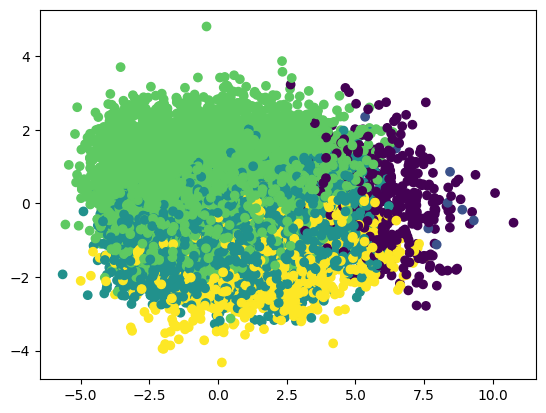

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# On choisit 4 dimensions pour la PCA
pca_components = 10

# Initialiser le modèle PCA
pca_model = PCA(n_components=pca_components, random_state=42)

# Transformer les données en utilisant la PCA
X_pca = pca_model.fit_transform(filled_df)

# Visualiser les données réduites
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)
plt.show()

In [26]:
filled_df

array([[-0.9698597 , -0.63581369,  0.65127864, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.41703812,  0.41466578,  0.65127864, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.48253322,  1.46514525,  0.65127864, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.10024668, -0.02132259, -1.53544111, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.09071522, -0.02132259,  0.65127864, ...,  1.        ,
         0.        ,  0.        ],
       [ 3.25541942,  3.90428303,  0.65127864, ...,  0.        ,
         1.        ,  0.        ]])

on fait le mean de nos variables numerique
on fait le mode de nos variables categoriable , on essaye d'interpreter le cluster par rapport à nos cluster pour réarrangernos variables

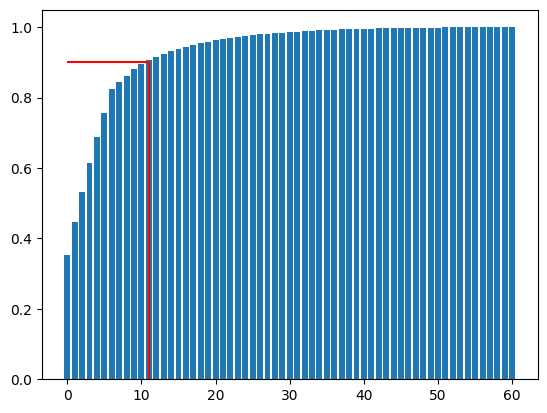

In [27]:
from sklearn.decomposition import PCA
X = filled_df
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)

import matplotlib.pyplot as plt
plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

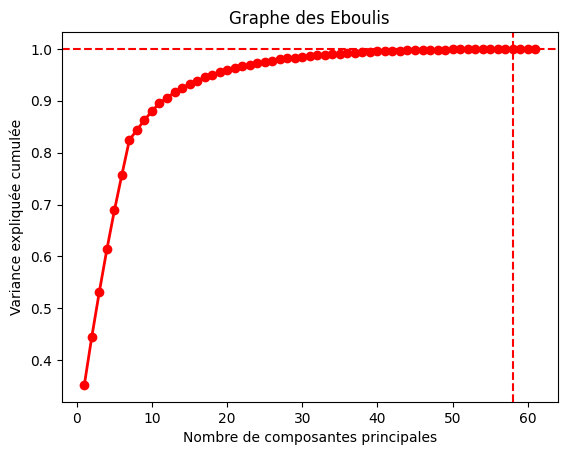

In [28]:

# Instancier l'objet PCA avec toutes les composantes principales
pca = PCA()

# Adapter le modèle PCA aux données
pca.fit(filled_df)

# Calculer la variance expliquée par chaque composante
variance_ratio = pca.explained_variance_ratio_

# Calculer la somme cumulée des variances expliquées
cumulative_variances = np.cumsum(variance_ratio)

# Afficher le graphe des Eboulis
plt.plot(np.arange(1, len(variance_ratio)+1), cumulative_variances, 'ro-', linewidth=2)
plt.title('Graphe des Eboulis')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée')

# Ajouter des lignes verticales pour représenter les points d'inflexion de la courbe
diff_cumulative_variances = np.diff(cumulative_variances)
change_in_cumulative_variances = np.diff(diff_cumulative_variances)
optimal_components = np.argmax(change_in_cumulative_variances) + 1
plt.axvline(x=optimal_components, color='r', linestyle='--')
plt.axhline(y=cumulative_variances[optimal_components-1], color='r', linestyle='--')

plt.show()

Faire un radar plot
faire un dataframe à partir des clusters et commencer à visualiser

In [29]:
df_radar=df_grouped.reset_index()

In [30]:
df_radar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cluster                        5 non-null      uint64 
 1   customer_state                 5 non-null      object 
 2   payment_type                   5 non-null      object 
 3   product_category_name_english  5 non-null      object 
 4   prix_total                     5 non-null      float64
 5   montant                        5 non-null      float64
 6   frequence                      5 non-null      int64  
 7   payment_installments           5 non-null      float64
 8   payment_value                  5 non-null      float64
 9   review_score                   5 non-null      float64
 10  freight_value                  5 non-null      float64
 11  product_description_lenght     5 non-null      float64
 12  product_photos_qty             5 non-null      float64

ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

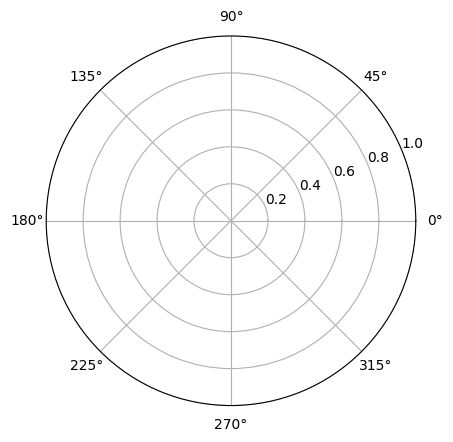

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Exemple de données
labels = ['0', '1', '2', '3']
data = df_radar['cluster'].values

# Calculez les angles pour chaque variable
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.concatenate((angles,[angles[0]]))  # Assurez-vous que le diagramme est fermé

# Créez un sous-tracé polar pour le graphique
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)

# Tracez le graphique
data = np.concatenate((data,[data[0]]))  # Assurez-vous que le diagramme est fermé
ax.plot(angles, data, 'o-', linewidth=2)
ax.fill(angles, data, alpha=0.25)

# Ajoutez les étiquettes pour chaque variable
ax.set_thetagrids(np.linspace(0, 360, len(labels) + 1)[:-1], labels)

# Ajustez la position des étiquettes
ax.set_rlabel_position(-22.5)

# Ajoutez une légende pour le graphique
plt.legend(['Données'], loc='best')

# Ajoutez un titre pour le graphique
plt.title('Diagramme en radar')

# Affichez le graphique
plt.show()

Essayons d'autre alogorithmes de clusterisation 

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np



# Séparer les variables numériques et catégoriques
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=[object]).columns

# Appliquer une transformation logarithmique sur les variables numériques
df[numeric_cols] = np.log(df[numeric_cols] + 1)

# Encoder les variables catégoriques avec OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoded = onehot_encoder.fit_transform(df[categorical_cols])
onehot_encoded_columns = [f'{col}_{value}' for col, categories in zip(categorical_cols, onehot_encoder.categories_) for value in categories]
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoded_columns, index=df.index)

# Normaliser les variables numériques
df[numeric_cols] = preprocessing.StandardScaler().fit_transform(df[numeric_cols])

# Combiner les variables numériques et catégoriques encodées en une seule dataframe
df_encoded = pd.concat([df[numeric_cols], onehot_encoded_df], axis=1)

/home/simplon/miniconda3/envs/k_means/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
/home/simplon/miniconda3/envs/k_means/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


On va considerer k = 4 , au vue des résultats données par la méthode précedentes 

In [ ]:
df_encoded

,prix_total,montant,frequence,payment_installments,payment_value,review_score,freight_value,product_description_lenght,product_photos_qty,price,...,product_category_name_english_Health_Beauty,product_category_name_english_Home,product_category_name_english_Market_place,product_category_name_english_Office_Supplies,product_category_name_english_Party_Supplies,product_category_name_english_Pet_Supplies,product_category_name_english_Signaling_Security,product_category_name_english_Sports_Leisure,product_category_name_english_Technology,product_category_name_english_Toys_Games
78319,-0.884202,-0.651083,1.110223e-16,-0.916100,-0.703325,0.528696,-0.082519,0.100791,1.516200,-0.839603,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35213,0.221901,0.347433,1.110223e-16,0.013380,-0.055532,-0.318572,0.161082,-0.701094,1.239015,0.433211,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59459,1.599054,1.484338,1.110223e-16,1.508871,1.055913,0.528696,0.505352,1.322881,-0.943675,1.881448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
64535,-0.111351,-0.087195,1.110223e-16,1.508871,-0.288794,0.528696,-0.230764,-2.105454,-0.943675,0.064120,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59983,-0.960768,-0.651083,1.110223e-16,0.512869,-0.803901,-0.318572,-2.099413,0.274242,0.299616,-0.933958,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34330,-1.073255,-1.455293,NaN,-0.916100,-0.798607,0.528696,-0.216792,-0.027188,0.299616,-1.074582,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48335,0.248184,0.347433,1.110223e-16,-0.916100,-0.062529,-0.318572,-0.398425,1.102041,0.299616,0.461919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75209,-0.102265,-0.087195,NaN,0.856472,-0.196996,0.528696,1.031194,-0.463396,1.239015,0.074319,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2065,-0.111351,-0.087195,1.110223e-16,-0.916100,-0.286059,NaN,-0.170236,0.914920,-0.943675,0.064120,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:

# Remplir les valeurs manquantes avec la moyenne
filled_df_dbscan = df_encoded.transform(lambda x: x.fillna(x.mean()))
# Imputer pour remplacer les valeurs manquantes par la moyenne des colonnes
imputer = SimpleImputer(strategy='mean')

# Imputer les valeurs manquantes dans filled_df_dbscan
filled_df_dbscan = imputer.fit_transform(filled_df_dbscan)

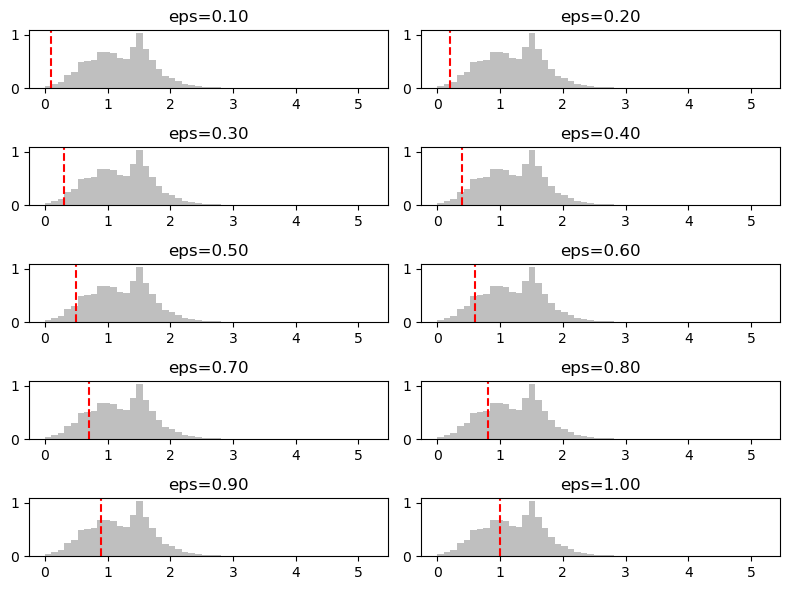

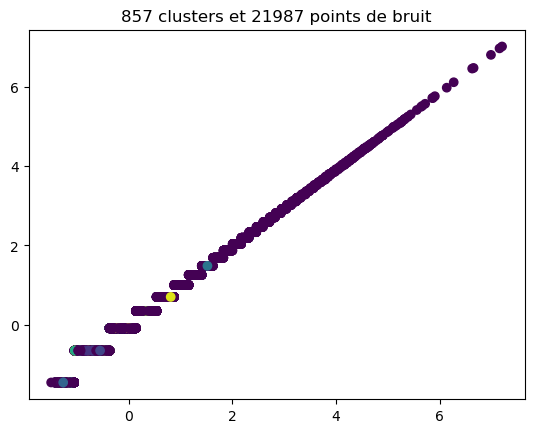

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# Générer des données aléatoires
X = filled_df_dbscan

# Calculer la distance au k-ième voisin le plus proche pour chaque point
k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)
dist_k = distances[:, k-1]

# Choisir une grille de valeurs pour eps et min_samples
eps_grid = np.linspace(0.1, 1, 10)
min_samples_grid = [2, 3, 4, 5]

# Appliquer DBSCAN pour chaque paire de valeurs (eps, min_samples) dans la grille
n_clusters = np.zeros((len(eps_grid), len(min_samples_grid)))
n_noise = np.zeros((len(eps_grid), len(min_samples_grid)))

for i, eps in enumerate(eps_grid):
    for j, min_samples in enumerate(min_samples_grid):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        n_clusters[i, j] = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        n_noise[i, j] = np.sum(dbscan.labels_ == -1)

# Tracer la courbe de décroissance de la densité pour chaque valeur de k
plt.figure(figsize=(8, 6))

for i, eps in enumerate(eps_grid):
    plt.subplot(5, 2, i+1)
    plt.hist(dist_k, bins=50, density=True, alpha=0.5, color='gray')
    plt.axvline(eps, color='red', linestyle='--')
    plt.title(f"eps={eps:.2f}")
    
plt.tight_layout()
plt.show()

# Trouver la valeur optimale de eps en examinant les courbes de décroissance de la densité
eps_opt = 0.5  # par exemple, on choisit le "creux" à eps=0.5

# Appliquer DBSCAN avec eps_opt et un min_samples approprié
min_samples_opt = 3
dbscan_opt = DBSCAN(eps=eps_opt, min_samples=min_samples_opt)
dbscan_opt.fit(X)

# Afficher le résultat du clustering
plt.scatter(X[:, 0], X[:, 1], c=dbscan_opt.labels_)
plt.title(f"{n_clusters[5, 1]:.0f} clusters et {n_noise[5, 1]:.0f} points de bruit")
plt.show()


In [ ]:
#On sauvegarde notre nombre de cluster ici
cluster_pour_pca =int(n_clusters[5, 1])
cluster_pour_pca

857

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Générer des données aléatoires
X = filled_df_dbscan

# Calculer la distance au k-ième voisin le plus proche pour chaque point
k = 4
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)
dist_k = distances[:, k-1]

# Choisir une grille de valeurs pour eps et min_samples
eps_grid = np.linspace(0.1, 1, 10)
min_samples_grid = [2, 3, 4, 5]

# Appliquer DBSCAN pour chaque paire de valeurs (eps, min_samples) dans la grille
n_clusters = np.zeros((len(eps_grid), len(min_samples_grid)))
n_noise = np.zeros((len(eps_grid), len(min_samples_grid)))

for i, eps in enumerate(eps_grid):
    for j, min_samples in enumerate(min_samples_grid):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)
        n_clusters[i, j] = len(np.unique(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
        n_noise[i, j] = np.sum(dbscan.labels_ == -1)

# Trouver la valeur optimale de eps en examinant les courbes de décroissance de la densité
eps_opt = 0.5  # par exemple, on choisit le "creux" à eps=0.5

# Appliquer DBSCAN avec eps_opt et un min_samples approprié
min_samples_opt = 3
dbscan_opt = DBSCAN(eps=eps_opt, min_samples=min_samples_opt)
dbscan_opt.fit(X)

# Reduce dimensionality of data with PCA
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_opt.labels_, cmap='viridis')
plt.title(f"{n_clusters[5, 1]:.0f} clusters et {n_noise[5, 1]:.0f} points de bruit")
plt.show()

KeyboardInterrupt: 

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


# Calculer les distances k-distance
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(df_encoded)
distances, indices = nbrs.kneighbors(df_encoded)
k_distances = np.sort(distances[:,k-1], axis=0)

# Tracer la courbe de décroissance de la densité
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(k_distances, 'bo-')
ax.set_xlabel('Points triés par distance k-distance')
ax.set_ylabel('Distance k-distance')
ax.set_title('Méthode de la courbe de décroissance de la densité')
plt.show()

ValueError: Input X contains NaN.
NearestNeighbors does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
df_copy_dbscan =df.copy()

Si on veux aller plus loin Creation de carte 

In [ ]:
import requests
import folium
from folium.plugins import FastMarkerCluster, Fullscreen, MiniMap, HeatMap, HeatMapWithTime, LocateControl

olist_orders = pd.read_csv('olist_orders_dataset.csv')
olist_geolocation = pd.read_csv('olist_geolocation_dataset.csv')
olist_customer = pd.read_csv('olist_customers_dataset.csv')
olist_order_items = pd.read_csv('olist_order_items_dataset.csv')

In [ ]:
df_orders = olist_orders.merge(olist_customer, how='left', on='customer_id')


In [ ]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
                  'order_estimated_delivery_date']
for col in timestamp_cols:
    df_orders[col] = pd.to_datetime(df_orders[col])
    
# Extracting attributes for purchase date - Year and Month
df_orders['order_purchase_year'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.year)
df_orders['order_purchase_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.month)
df_orders['order_purchase_month_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%b'))
df_orders['order_purchase_year_month'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
df_orders['order_purchase_date'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m%d'))

# Extracting attributes for purchase date - Day and Day of Week
df_orders['order_purchase_day'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.day)
df_orders['order_purchase_dayofweek'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.dayofweek)
df_orders['order_purchase_dayofweek_name'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))

# Extracting attributes for purchase date - Hour and Time of the Day
df_orders['order_purchase_hour'] = df_orders['order_purchase_timestamp'].apply(lambda x: x.hour)
hours_bins = [-0.1, 6, 12, 18, 23]
hours_labels = ['Dawn', 'Morning', 'Afternoon', 'Night']
df_orders['order_purchase_time_day'] = pd.cut(df_orders['order_purchase_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,order_purchase_year,order_purchase_month,order_purchase_month_name,order_purchase_year_month,order_purchase_date,order_purchase_day,order_purchase_dayofweek,order_purchase_dayofweek_name,order_purchase_hour,order_purchase_time_day
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2017,10,Oct,201710,20171002,2,0,Mon,10,Morning
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,2018,7,Jul,201807,20180724,24,1,Tue,20,Night
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,2018,8,Aug,201808,20180808,8,2,Wed,8,Morning
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,2017,11,Nov,201711,20171118,18,5,Sat,19,Night
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,2018,2,Feb,201802,20180213,13,1,Tue,21,Night


In [ ]:
# Merging orders and order_items
df_orders_items = df_orders.merge(olist_order_items, how='left', on='order_id')

# Using the API to bring the region to the data
r = requests.get('https://servicodados.ibge.gov.br/api/v1/localidades/mesorregioes')
content = [c['UF'] for c in json.loads(r.text)]
br_info = pd.DataFrame(content)
br_info['nome_regiao'] = br_info['regiao'].apply(lambda x: x['nome'])
br_info.drop('regiao', axis=1, inplace=True)
br_info.drop_duplicates(inplace=True)

# Threting geolocations outside brazilian map

#Brazils most Northern spot is at 5 deg 16′ 27.8″ N latitude.;
geo_prep = olist_geolocation[olist_geolocation.geolocation_lat <= 5.27438888]
#it’s most Western spot is at 73 deg, 58′ 58.19″W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng >= -73.98283055]
#It’s most southern spot is at 33 deg, 45′ 04.21″ S Latitude.
geo_prep = geo_prep[geo_prep.geolocation_lat >= -33.75116944]
#It’s most Eastern spot is 34 deg, 47′ 35.33″ W Long.
geo_prep = geo_prep[geo_prep.geolocation_lng <=  -34.79314722]
geo_group = geo_prep.groupby(by='geolocation_zip_code_prefix', as_index=False).min()

# Merging all the informations
df_orders_items = df_orders_items.merge(br_info, how='left', left_on='customer_state', right_on='sigla')
df_orders_items = df_orders_items.merge(geo_group, how='left', left_on='customer_zip_code_prefix', 
                                        right_on='geolocation_zip_code_prefix')
df_orders_items.head()

SSLError: HTTPSConnectionPool(host='servicodados.ibge.gov.br', port=443): Max retries exceeded with url: /api/v1/localidades/mesorregioes (Caused by SSLError(SSLError(1, '[SSL: UNSAFE_LEGACY_RENEGOTIATION_DISABLED] unsafe legacy renegotiation disabled (_ssl.c:992)')))

In [ ]:
# Filtering data between 201701 and 201808
df_orders_filt = df_orders_items[(df_orders_items['order_purchase_year_month'].astype(int) >= 201701)]
df_orders_filt = df_orders_filt[(df_orders_filt['order_purchase_year_month'].astype(int) <= 201808)]

In [ ]:
# Grouping geolocation data for plotting a heatmap
heat_data = df_orders_filt.groupby(by=['geolocation_lat', 'geolocation_lng'], as_index=False).count().iloc[:, :3]

# Creating a mapa using folium
map1 = folium.Map(
    location=[-15, -50], 
    zoom_start=4.0, 
    tiles='cartodbdark_matter'
)

# Plugin: HeatMap
HeatMap(
    name='Mapa de Calor',
    data=heat_data,
    radius=10,
    max_zoom=13
).add_to(map1)

map1

Isolation forest , recherche d'anomalie